In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

%matplotlib inline

In [2]:
wine = datasets.load_wine()

In [3]:
df = pd.DataFrame(wine["data"], columns=wine["feature_names"])
df["target"] = wine["target"]
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
df.shape

(178, 14)

178 rows and then 14 columns
14th column called targe is the classification column

In [5]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

meaning of df.isna().sum(), no missing data is given in the datasets

## Train Test Split

In [6]:
X = df
y = X.pop("target")

pop function mawawala yung target sa dataset pag nirun yung x.head()

In [7]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [8]:
X.shape

(178, 13)

In [9]:
y.unique()

array([0, 1, 2])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=55)

In [11]:
X_train.shape

(142, 13)

In [12]:
X_test.shape

(36, 13)

## Train Classifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=3)

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
knn.score(X_test, y_test)

0.8333333333333334

0.8333333333333334 or 83% accuracy of trained model

Tunning Sensitivity of Model To "n_neighbors"

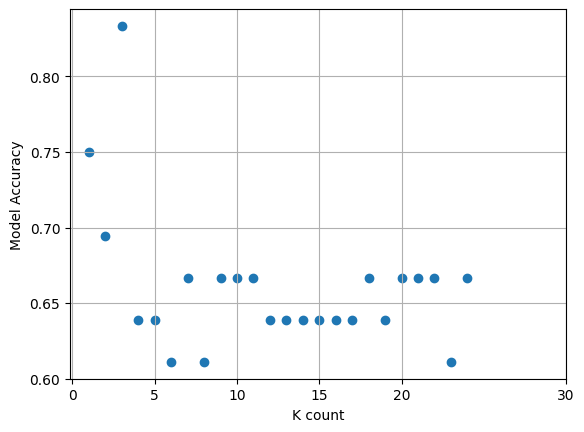

In [16]:
k_range = range(1,25)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
    
plt.figure()
plt.xlabel("K count")
plt.ylabel("Model Accuracy")
plt.scatter(k_range, scores)
plt.grid()
plt.xticks([0, 5, 10, 15, 20, 30])
plt.show()



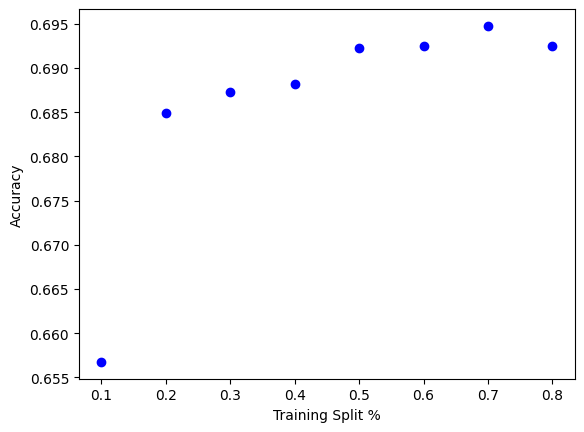

In [17]:
test_sizes = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

knn = KNeighborsClassifier(n_neighbors=5)

plt.figure()

for test_size in test_sizes:
    scores = []
    
    for i in range(1, 1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1 - test_size)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(test_size, np.mean(scores), "bo")

plt.xlabel("Training Split %")
plt.ylabel("Accuracy")
plt.show()



## MAKE PREDICTIONS

In [18]:
prediction = knn.predict(X_test)

In [19]:
prediction

array([0, 2, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 1, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 0, 0, 0, 2, 0, 0, 2, 1, 1,
       0, 2, 1, 0, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 0,
       1, 1, 2, 2, 2, 0, 2, 2, 0, 1, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 0, 2, 0, 2, 0, 2, 0, 1, 1, 2,
       0, 1, 2, 2, 0, 0, 1])

In [20]:
cm = confusion_matrix(y_test, prediction)

In [21]:
cm

array([[46,  0, 10],
       [ 2, 51, 11],
       [ 0, 23, 18]], dtype=int64)

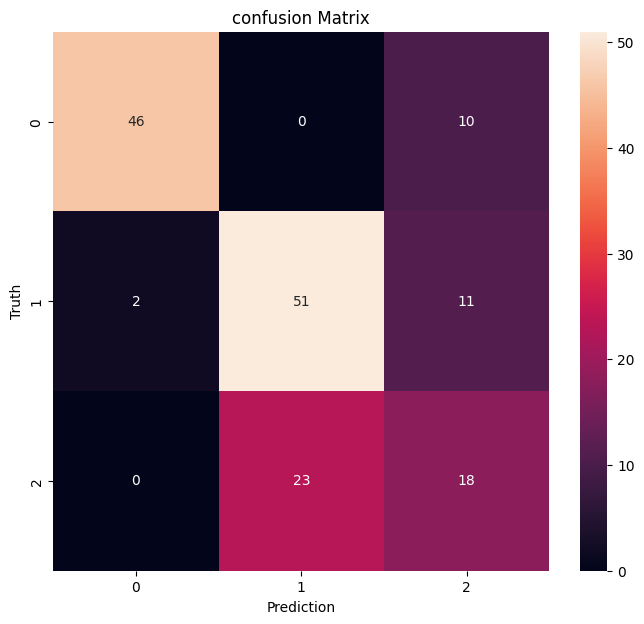

In [22]:
plt.figure(figsize=(8, 7))
sns.heatmap(cm, annot=True)
plt.title("confusion Matrix")
plt.ylabel("Truth")
plt.xlabel("Prediction")
plt.show()

In [23]:
accuracy_score(y_test, prediction)

0.7142857142857143

In [24]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88        56
           1       0.69      0.80      0.74        64
           2       0.46      0.44      0.45        41

    accuracy                           0.71       161
   macro avg       0.70      0.69      0.69       161
weighted avg       0.72      0.71      0.72       161

